# Problem Set 7 - Solutions
### Heather Chen

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

Since Dr. Evans did not specify the method that we can use for modeling, I choose newton-cg method in this homework for the warnings not appearing. 

### 1. Multinomial logistic regression and cross validation

#### a. Multinomial regression model

In [2]:
#Load data to a dataframe
drink_df = pd.read_csv('../PS7/data/strongdrink.txt', sep = ',')
drink_df

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
172,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
173,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
174,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
X = drink_df[['alco', 'malic', 'tot_phen', 'color_int']]
y = drink_df['cultivar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) 

In [4]:
MultiLog = LogisticRegression(solver='newton-cg', multi_class='multinomial')
MultiLog.fit(X_train, y_train)

#Coefficients and intercepts for j=1 and j=2
pd.DataFrame({"j=1":np.append(MultiLog.intercept_[0],MultiLog.coef_[0]),
              "j=2":np.append(MultiLog.intercept_[1],MultiLog.coef_[1])},
               index=["beta0","beta1",'beta2','beta3','beta4'])

,j=1,j=2
beta0,-24.011332,22.801680
beta1,1.700433,-1.467985
beta2,-0.265610,-0.333051
beta3,1.223894,0.664006
beta4,0.022748,-0.922709


In [5]:
#Error rates
y_pred = MultiLog.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

    accuracy                           0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



The model best predicts cultivar of category 2 and 3. <br>

The error rates are 13%, 0%, and 0% for the three categories respectively, and the model best predicts cultivar category 3. <br>
Given its count in "support" column, it is not the category with the most observations.

In [6]:
#MSE for the test set
mean_squared_err = np.mean((y_test != y_pred) ** 2)
print("Mean squared error is {}".format(mean_squared_err))

Mean squared error is 0.045454545454545456


#### b. LOOCV

In [24]:
X = drink_df[['alco', 'malic', 'tot_phen', 'color_int']].values
y = drink_df['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)

ytest = np.zeros(Xvars.shape[0])
ypred = np.zeros(Xvars.shape[0])

# This loop will take 20 or 30 seconds
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    MultiLog = LogisticRegression(solver='newton-cg', multi_class='multinomial')
    MultiLog.fit(X_train, y_train)
    y_pred = MultiLog.predict(X_test)
    ytest[test_index] = y_test
    ypred[test_index] = y_pred
    if y_test == y_pred:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1

MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.07954545454545454 , test estimate MSE standard err= 0.2705882022679695


In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



The error rates are 10%, 9%, and 4% respectively. Compared with the error rates obtained in (a), we can see that category 3 still has the lowest error rates, while category 1 still has the highest. The error rate increases except for category 1. 

#### c. k-fold cross validation

In [27]:
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=10) 
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    MultiLog = LogisticRegression(solver='newton-cg', multi_class='multinomial')
    MultiLog.fit(X_train, y_train)
    y_pred = MultiLog.predict(X_test)
    ytest[test_index] = y_test
    ypred[test_index] = y_pred
    
    n = len(y_pred)
    err=[1 if y_test[i] != y_pred[i] else 0 for i in range(n)]  
    MSE_vec_kf[k_ind]=np.mean(err)
    
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.09090909090909091 test estimate MSE standard err= 0.04821182598999188


In [28]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



The error rates are 13%, 9% and 4% respectively. Generally speaking, the error rates in (c) increasea compared to the results in (a). The error rates for category 2 and 3 have not changed compared with (b), the error rate for category 1 has increased. 

### 2. Splines and interpolation
#### a. scatterplot

In [30]:
cool_df = pd.read_csv('../PS7/data/CoolIndex.txt', sep = ',', names=['age', 'cool'])
cool_df

,age,cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918
...,...,...
951,91.0,21.872584
952,92.0,20.898071
953,93.0,17.756216
954,94.0,23.857727


Text(0, 0.5, 'coolness index')

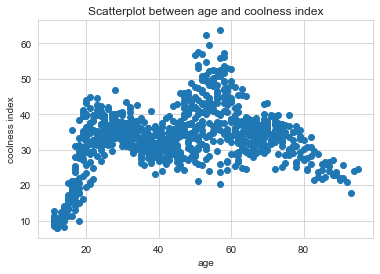

In [31]:
plt.scatter(cool_df['age'], cool_df['cool'])
plt.title('Scatterplot between age and coolness index')
plt.xlabel('age')
plt.ylabel('coolness index')

#### b. OLS for stepwise function

In [37]:
import statsmodels.api as sm

#Estimated coefficients
cool_df["gap1"] = np.where((cool_df['age']>=11) & (cool_df['age']<22),1,0)
cool_df["gap2"] = np.where((cool_df['age']>=22) & (cool_df['age']<40),1,0)
cool_df["gap3"] = np.where((cool_df['age']>=40) & (cool_df['age']<59),1,0)
cool_df["gap4"] = np.where((cool_df['age']>=59) & (cool_df['age']<77),1,0)
cool_df["gap5"] = np.where((cool_df['age']>=77) & (cool_df['age']<=95),1,0)

X = cool_df[["gap1","gap2","gap3","gap4","gap5"]]
res = sm.OLS(cool_df['cool'], X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        11:37:19   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gap1          20.1025      0.562     35.746      0.0

In [38]:
#Predict using this model
print('The predicted coolness for a 73-year-old is: ', res.predict([0,0,0,1,0])[0])

The predicted coolness for a 73-year-old is:  35.22540004024275


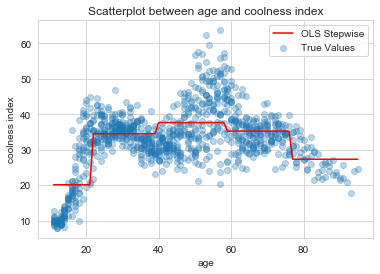

In [39]:
plt.scatter(cool_df['age'], cool_df['cool'], alpha=0.3,label="True Values")
plt.plot(cool_df['age'], res.predict(), "r" , label = "OLS Stepwise")
plt.legend()
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('Scatterplot between age and coolness index')
plt.show()

#### c. Linear spline

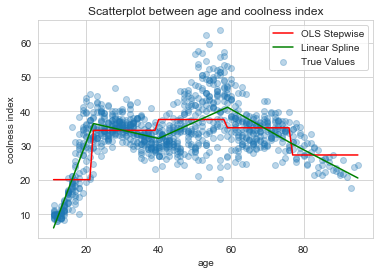

In [41]:
from scipy.interpolate import LSQUnivariateSpline

t = np.array([22,40,59,77])
cool_df.sort_index(0, ascending=True, inplace=True)
group = cool_df.groupby('age', as_index = False).mean()

usl = LSQUnivariateSpline(group.age.values, group.cool.values, t, k=1)

plt.scatter(cool_df['age'], cool_df['cool'], alpha=0.3, label="True Values")
plt.plot(cool_df['age'], res.predict(),"r",label = "OLS Stepwise")
plt.plot(cool_df['age'], usl(cool_df['age']), "g", label = "Linear Spline")
plt.legend()
plt.xlabel("age")
plt.ylabel("coolness index")
plt.title('Scatterplot between age and coolness index')
plt.show()

In [43]:
#Predict using this model
print('The predicted coolness for a 73-year-old is:', usl(73))

The predicted coolness for a 73-year-old is: 32.86784862349653


#### d. cubic spline

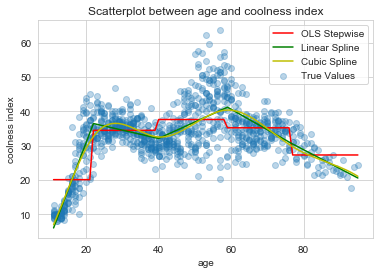

In [44]:
cub = LSQUnivariateSpline(group.age.values, group.cool.values, t, k=3)

plt.scatter(cool_df['age'], cool_df['cool'], alpha=0.3, label="True Values")
plt.plot(cool_df['age'], res.predict(),"r",label = "OLS Stepwise")
plt.plot(cool_df['age'], usl(cool_df['age']), "g", label = "Linear Spline")
plt.plot(cool_df['age'], cub(cool_df['age']), "y", label = "Cubic Spline")
plt.legend()
plt.xlabel("age")
plt.ylabel("coolness index")
plt.title('Scatterplot between age and coolness index')
plt.show()

In [45]:
#Predict using this model
print('The predicted coolness for a 73-year-old is:', cub(73))

The predicted coolness for a 73-year-old is: 32.642301066279764
